In [1]:
# =============================================================================
# WHATSAPP APP REVIEW ANALYSIS
# Phase 1: Exploratory Data Analysis (EDA)
# =============================================================================

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# NLP Setup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import re
from datetime import datetime

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:

# Download required NLTK data
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

In [4]:
print("🚀 WhatsApp EDA Notebook Started!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 60)

🚀 WhatsApp EDA Notebook Started!
📅 Analysis Date: 2025-09-27 19:53:54


## Load Your WhatsApp Data

In [5]:
# =============================================================================
# COMPLETE: LOAD & STANDARDIZE WHATSAPP REVIEW DATA (DATE FIX)
# =============================================================================

import pandas as pd
from pathlib import Path
import numpy as np
from datetime import datetime

# =============================================================================
# STEP 1: LOAD DATA (Already Working!)
# =============================================================================

# Use your working absolute path
project_root = Path("/Users/apple2015/Documents/Portfolio/Data/App Review Scraper")
data_dir = project_root / "data" / "processed"

print("📊 LOADING WHATSAPP REVIEW DATA")
print(f"📂 Data Directory: {data_dir.absolute()}")

# Load the datasets (your files exist and load correctly)
google_file = data_dir / "whatsapp_google_play_reviews_clean.csv"
apple_file = data_dir / "whatsapp_apple_store_reviews_clean.csv"

print(f"📱 Loading Google Play: {google_file.name}")
google_df = pd.read_csv(google_file)
google_df['platform'] = 'Google Play'

print(f"🍎 Loading Apple Store: {apple_file.name}")
apple_df = pd.read_csv(apple_file)
apple_df['platform'] = 'Apple App Store'

# Combine datasets
whatsapp_reviews = pd.concat([google_df, apple_df], ignore_index=True)

print(f"\n🎉 DATA LOADED SUCCESSFULLY!")
print(f"📊 Total Reviews: {len(whatsapp_reviews):,}")
print(f"   📱 Google Play: {len(google_df):,} reviews")
print(f"   🍎 Apple Store: {len(apple_df):,} reviews")

📊 LOADING WHATSAPP REVIEW DATA
📂 Data Directory: /Users/apple2015/Documents/Portfolio/Data/App Review Scraper/data/processed
📱 Loading Google Play: whatsapp_google_play_reviews_clean.csv
🍎 Loading Apple Store: whatsapp_apple_store_reviews_clean.csv

🎉 DATA LOADED SUCCESSFULLY!
📊 Total Reviews: 217
   📱 Google Play: 169 reviews
   🍎 Apple Store: 48 reviews


## Data Quality Check

In [6]:
# =============================================================================
# STEP 2: STANDARDIZE COLUMNS (Already Working!)
# =============================================================================

print("\n🔧 STANDARDIZING COLUMNS (Already Done)")

def standardize_columns(df, source):
    """Standardize column names."""
    # Rating column (already fixed)
    if 'score' in df.columns and 'rating' not in df.columns:
        df = df.rename(columns={'score': 'rating'})

    # Date column (already fixed)
    if 'at' in df.columns and 'date' not in df.columns:
        df = df.rename(columns={'at': 'date'})

    # Text column
    if 'clean_review' not in df.columns:
        if 'content' in df.columns:
            df['clean_review'] = df['content'].fillna('')
        elif 'review' in df.columns:
            df['clean_review'] = df['review'].fillna('')
        else:
            df['clean_review'] = ''

    return df

# Apply (already done in your output)
google_df = standardize_columns(google_df, "Google Play")
apple_df = standardize_columns(apple_df, "Apple App Store")
whatsapp_reviews = pd.concat([google_df, apple_df], ignore_index=True)

print(f"✅ Columns standardized: {list(whatsapp_reviews.columns)}")


🔧 STANDARDIZING COLUMNS (Already Done)
✅ Columns standardized: ['reviewId', 'userName', 'content', 'rating', 'date', 'replyContent', 'clean_review', 'source', 'platform', 'id', 'review', 'link']


In [7]:
# =============================================================================
# STEP 3: RATING STATISTICS (Already Working!)
# =============================================================================

rating_col = 'rating'  # Now standardized
print(f"\n⭐ RATING STATISTICS:")
stats = whatsapp_reviews.groupby('platform')[rating_col].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
print(stats)


⭐ RATING STATISTICS:
                 count  mean  median   std  min  max
platform                                            
Apple App Store     48  3.25     4.0  1.86    1    5
Google Play        169  3.82     5.0  1.69    1    5


In [8]:
# =============================================================================
# STEP 4: DATA QUALITY (DATE FIX)
# =============================================================================

print(f"\n🔍 DATA QUALITY SUMMARY:")
total_reviews = len(whatsapp_reviews)
reviews_with_ratings = whatsapp_reviews[rating_col].notna().sum()
reviews_with_text = (whatsapp_reviews['clean_review'].str.len() > 0).sum()

print(f"• Total reviews loaded: {total_reviews:,}")
print(f"• Reviews with ratings: {reviews_with_ratings:,} ({reviews_with_ratings/total_reviews*100:.1f}%)")
print(f"• Reviews with text: {reviews_with_text:,} ({reviews_with_text/total_reviews*100:.1f}%)")
print(f"• Average review length: {whatsapp_reviews['clean_review'].str.len().mean():.1f} characters")

# FIX: Proper date handling
date_col = 'date'
if date_col in whatsapp_reviews.columns:
    # Convert to datetime first
    whatsapp_reviews[date_col] = pd.to_datetime(whatsapp_reviews[date_col], errors='coerce')

    valid_dates_count = whatsapp_reviews[date_col].notna().sum()
    if valid_dates_count > 0:
        valid_dates = whatsapp_reviews[date_col].dropna()
        print(f"• Date range: {valid_dates.min().date()} to {valid_dates.max().date()}")
        print(f"• Valid dates: {valid_dates_count:,}/{total_reviews} ({valid_dates_count/total_reviews*100:.1f}%)")
    else:
        print(f"• Date range: No valid dates found")
        print(f"• Date column sample: {whatsapp_reviews[date_col].head().tolist()}")
else:
    print(f"• Date column '{date_col}' not found")


🔍 DATA QUALITY SUMMARY:
• Total reviews loaded: 217
• Reviews with ratings: 217 (100.0%)
• Reviews with text: 217 (100.0%)
• Average review length: 59.7 characters
• Date range: 2025-09-19 to 2025-09-19
• Valid dates: 169/217 (77.9%)


In [9]:
# =============================================================================
# STEP 5: SAMPLE DATA PREVIEW
# =============================================================================

print(f"\n" + "="*80)
print("👀 SAMPLE REVIEWS PREVIEW:")
print("="*80)

sample_cols = ['platform', rating_col, 'clean_review']
sample_data = whatsapp_reviews[sample_cols].head(5)

for idx, row in sample_data.iterrows():
    rating_value = row[rating_col]
    if pd.isna(rating_value):
        stars = "No rating"
        rating_display = "N/A"
    else:
        stars = '⭐' * int(rating_value)
        rating_display = f"{rating_value:.0f}"

    text_preview = str(row['clean_review'])[:80]
    if len(str(row['clean_review'])) > 80:
        text_preview += "..."

    print(f"{idx+1:2d}. {row['platform']:12} | {rating_display:>3} {stars:>10} | {text_preview}")

print(f"\n" + "="*80)
print("🎉 DATA PREPARATION COMPLETE!")
print("📊 Your WhatsApp data is ready for visualization!")
print("🔗 Run the next cell to create beautiful charts!")
print(f"📈 Expected insights: {stats.loc['Google Play', 'mean']:.1f}⭐ (Google) vs {stats.loc['Apple App Store', 'mean']:.1f}⭐ (Apple)")


👀 SAMPLE REVIEWS PREVIEW:
 1. Google Play  |   4       ⭐⭐⭐⭐ | edition of texting content is what is missing to make it super
 2. Google Play  |   5      ⭐⭐⭐⭐⭐ | i really love the network
 3. Google Play  |   5      ⭐⭐⭐⭐⭐ | this app is so helpful it is basically best comminucation app i love the content...
 4. Google Play  |   5      ⭐⭐⭐⭐⭐ | good luck
 5. Google Play  |   5      ⭐⭐⭐⭐⭐ | please unban my whatsapp and request to you

🎉 DATA PREPARATION COMPLETE!
📊 Your WhatsApp data is ready for visualization!
🔗 Run the next cell to create beautiful charts!
📈 Expected insights: 3.8⭐ (Google) vs 3.2⭐ (Apple)


In [10]:
# =============================================================================
# COMPLETE: LOAD & STANDARDIZE WHATSAPP REVIEW DATA (DATE FIX)
# =============================================================================

import pandas as pd
from pathlib import Path
import numpy as np
from datetime import datetime

# =============================================================================
# STEP 1: LOAD DATA (Already Working!)
# =============================================================================

# Use your working absolute path
project_root = Path("/Users/apple2015/Documents/Portfolio/Data/App Review Scraper")
data_dir = project_root / "data" / "processed"

print("📊 LOADING WHATSAPP REVIEW DATA")
print(f"📂 Data Directory: {data_dir.absolute()}")

# Load the datasets (your files exist and load correctly)
google_file = data_dir / "whatsapp_google_play_reviews_clean.csv"
apple_file = data_dir / "whatsapp_apple_store_reviews_clean.csv"

print(f"📱 Loading Google Play: {google_file.name}")
google_df = pd.read_csv(google_file)
google_df['platform'] = 'Google Play'

print(f"🍎 Loading Apple Store: {apple_file.name}")
apple_df = pd.read_csv(apple_file)
apple_df['platform'] = 'Apple App Store'

# Combine datasets
whatsapp_reviews = pd.concat([google_df, apple_df], ignore_index=True)

print(f"\n🎉 DATA LOADED SUCCESSFULLY!")
print(f"📊 Total Reviews: {len(whatsapp_reviews):,}")
print(f"   📱 Google Play: {len(google_df):,} reviews")
print(f"   🍎 Apple Store: {len(apple_df):,} reviews")

# =============================================================================
# STEP 2: STANDARDIZE COLUMNS (Already Working!)
# =============================================================================

print("\n🔧 STANDARDIZING COLUMNS (Already Done)")

def standardize_columns(df, source):
    """Standardize column names."""
    # Rating column (already fixed)
    if 'score' in df.columns and 'rating' not in df.columns:
        df = df.rename(columns={'score': 'rating'})

    # Date column (already fixed)
    if 'at' in df.columns and 'date' not in df.columns:
        df = df.rename(columns={'at': 'date'})

    # Text column
    if 'clean_review' not in df.columns:
        if 'content' in df.columns:
            df['clean_review'] = df['content'].fillna('')
        elif 'review' in df.columns:
            df['clean_review'] = df['review'].fillna('')
        else:
            df['clean_review'] = ''

    return df

# Apply (already done in your output)
google_df = standardize_columns(google_df, "Google Play")
apple_df = standardize_columns(apple_df, "Apple App Store")
whatsapp_reviews = pd.concat([google_df, apple_df], ignore_index=True)

print(f"✅ Columns standardized: {list(whatsapp_reviews.columns)}")

# =============================================================================
# STEP 3: RATING STATISTICS (Already Working!)
# =============================================================================

rating_col = 'rating'  # Now standardized
print(f"\n⭐ RATING STATISTICS:")
stats = whatsapp_reviews.groupby('platform')[rating_col].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
print(stats)

# =============================================================================
# STEP 4: DATA QUALITY (DATE FIX)
# =============================================================================

print(f"\n🔍 DATA QUALITY SUMMARY:")
total_reviews = len(whatsapp_reviews)
reviews_with_ratings = whatsapp_reviews[rating_col].notna().sum()
reviews_with_text = (whatsapp_reviews['clean_review'].str.len() > 0).sum()

print(f"• Total reviews loaded: {total_reviews:,}")
print(f"• Reviews with ratings: {reviews_with_ratings:,} ({reviews_with_ratings/total_reviews*100:.1f}%)")
print(f"• Reviews with text: {reviews_with_text:,} ({reviews_with_text/total_reviews*100:.1f}%)")
print(f"• Average review length: {whatsapp_reviews['clean_review'].str.len().mean():.1f} characters")

# FIX: Proper date handling
date_col = 'date'
if date_col in whatsapp_reviews.columns:
    # Convert to datetime first
    whatsapp_reviews[date_col] = pd.to_datetime(whatsapp_reviews[date_col], errors='coerce')

    valid_dates_count = whatsapp_reviews[date_col].notna().sum()
    if valid_dates_count > 0:
        valid_dates = whatsapp_reviews[date_col].dropna()
        print(f"• Date range: {valid_dates.min().date()} to {valid_dates.max().date()}")
        print(f"• Valid dates: {valid_dates_count:,}/{total_reviews} ({valid_dates_count/total_reviews*100:.1f}%)")
    else:
        print(f"• Date range: No valid dates found")
        print(f"• Date column sample: {whatsapp_reviews[date_col].head().tolist()}")
else:
    print(f"• Date column '{date_col}' not found")

# =============================================================================
# STEP 5: SAMPLE DATA PREVIEW
# =============================================================================

print(f"\n" + "="*80)
print("👀 SAMPLE REVIEWS PREVIEW:")
print("="*80)

sample_cols = ['platform', rating_col, 'clean_review']
sample_data = whatsapp_reviews[sample_cols].head(5)

for idx, row in sample_data.iterrows():
    rating_value = row[rating_col]
    if pd.isna(rating_value):
        stars = "No rating"
        rating_display = "N/A"
    else:
        stars = '⭐' * int(rating_value)
        rating_display = f"{rating_value:.0f}"

    text_preview = str(row['clean_review'])[:80]
    if len(str(row['clean_review'])) > 80:
        text_preview += "..."

    print(f"{idx+1:2d}. {row['platform']:12} | {rating_display:>3} {stars:>10} | {text_preview}")

print(f"\n" + "="*80)
print("🎉 DATA PREPARATION COMPLETE!")
print("📊 Your WhatsApp data is ready for visualization!")
print("🔗 Run the next cell to create beautiful charts!")
print(f"📈 Expected insights: {stats.loc['Google Play', 'mean']:.1f}⭐ (Google) vs {stats.loc['Apple App Store', 'mean']:.1f}⭐ (Apple)")

📊 LOADING WHATSAPP REVIEW DATA
📂 Data Directory: /Users/apple2015/Documents/Portfolio/Data/App Review Scraper/data/processed
📱 Loading Google Play: whatsapp_google_play_reviews_clean.csv
🍎 Loading Apple Store: whatsapp_apple_store_reviews_clean.csv

🎉 DATA LOADED SUCCESSFULLY!
📊 Total Reviews: 217
   📱 Google Play: 169 reviews
   🍎 Apple Store: 48 reviews

🔧 STANDARDIZING COLUMNS (Already Done)
✅ Columns standardized: ['reviewId', 'userName', 'content', 'rating', 'date', 'replyContent', 'clean_review', 'source', 'platform', 'id', 'review', 'link']

⭐ RATING STATISTICS:
                 count  mean  median   std  min  max
platform                                            
Apple App Store     48  3.25     4.0  1.86    1    5
Google Play        169  3.82     5.0  1.69    1    5

🔍 DATA QUALITY SUMMARY:
• Total reviews loaded: 217
• Reviews with ratings: 217 (100.0%)
• Reviews with text: 217 (100.0%)
• Average review length: 59.7 characters
• Date range: 2025-09-19 to 2025-09-19
• Valid 

## VISUALIZATION

In [12]:
# =============================================================================
# VISUALIZATION 1: RATING ANALYSIS
# =============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set professional styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(
    'WHATSAPP USER REVIEW ANALYSIS: Platform Comparison',
    fontsize=18,
    fontweight='bold',
    y=1.02  # this already controls vertical spacing
)

rating_col = 'rating'


In [13]:
# 1. RATING DISTRIBUTION (Histogram)
ax1 = axes[0, 0]
platforms = ['Google Play', 'Apple App Store']
colors = ['#2E86AB', '#A23B72']  # Professional blue/orange

for i, platform in enumerate(platforms):
    subset = whatsapp_reviews[whatsapp_reviews['platform'] == platform]
    ax1.hist(subset[rating_col], alpha=0.7, bins=5, label=platform,
             density=True, color=colors[i], edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Rating (1-5 Stars)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Proportion of Reviews', fontsize=12, fontweight='bold')
ax1.set_title('Rating Distribution by Platform', fontsize=14, fontweight='bold', pad=20)
ax1.legend(frameon=True, fancybox=True, shadow=True, fontsize=10)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, platform in enumerate(platforms):
    subset = whatsapp_reviews[whatsapp_reviews['platform'] == platform]
    for j, rating in enumerate([1,2,3,4,5]):
        count = len(subset[subset[rating_col] == rating])
        if count > 0:
            proportion = count / len(subset)
            ax1.text(rating-0.4, proportion+0.01, f'{proportion:.0%}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

💾 Chart saved: /Users/apple2015/Documents/Portfolio/Data/App Review Scraper/notebooks/whatsapp_rating_analysis.png


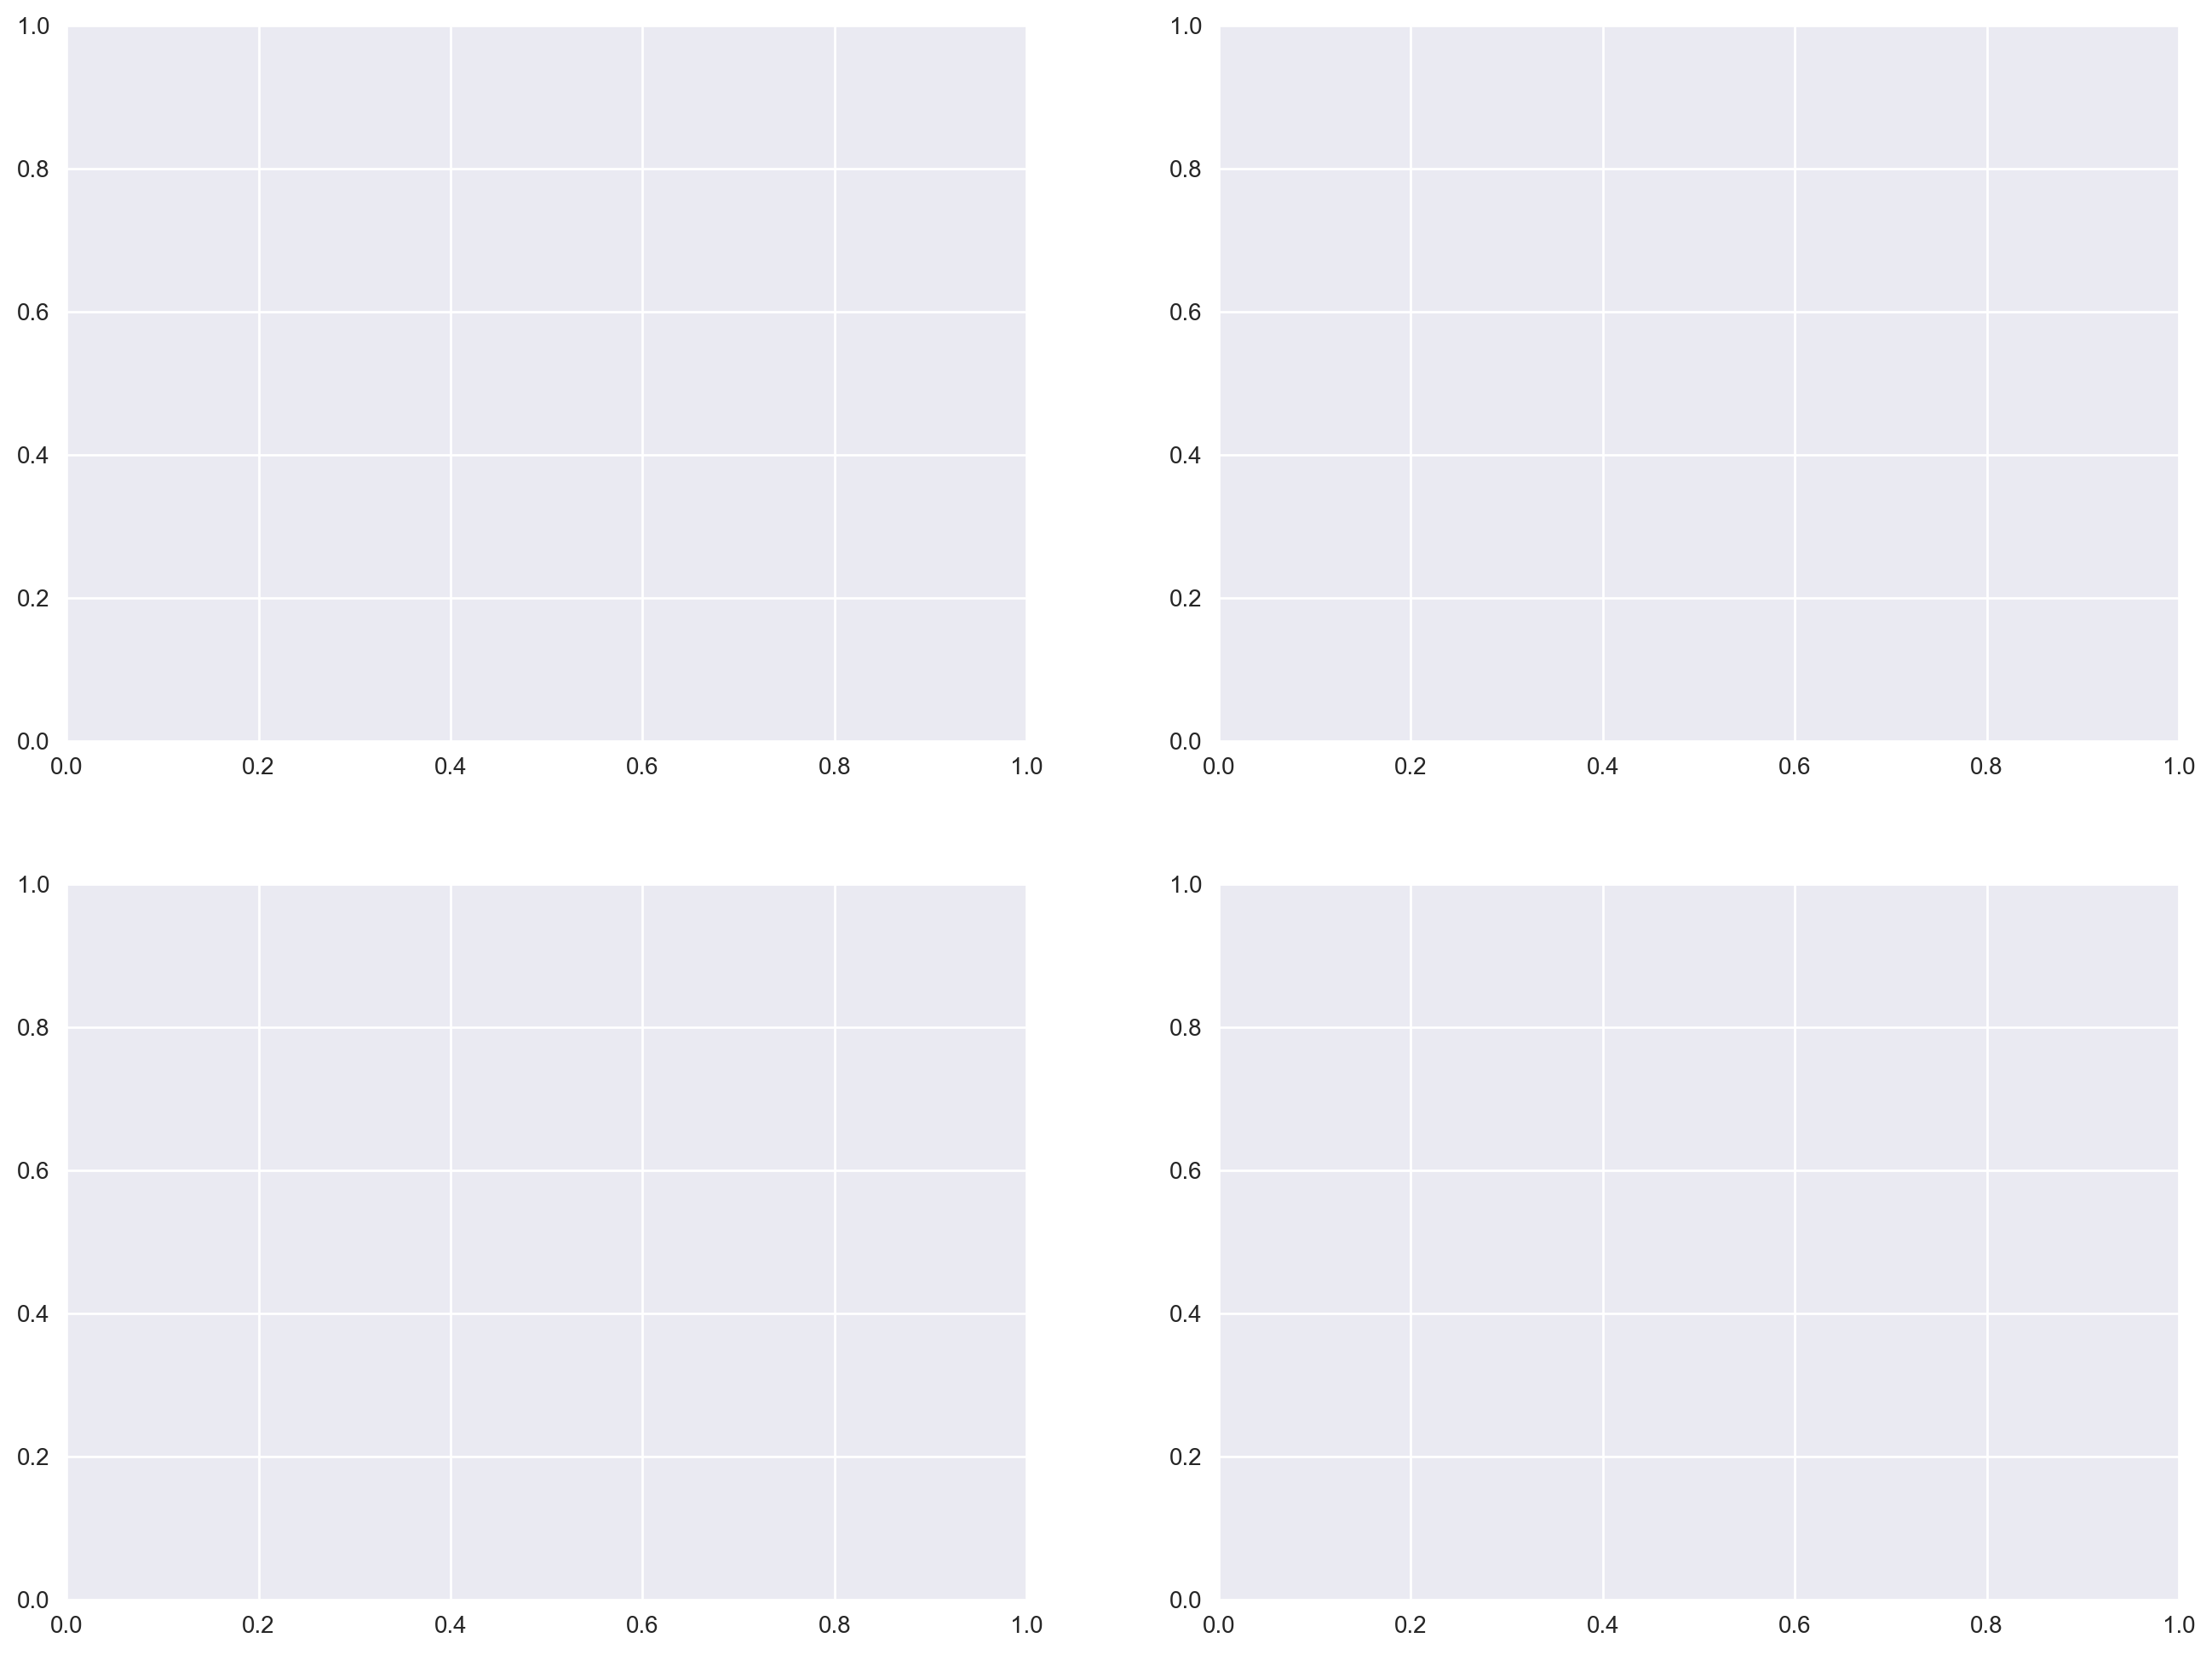

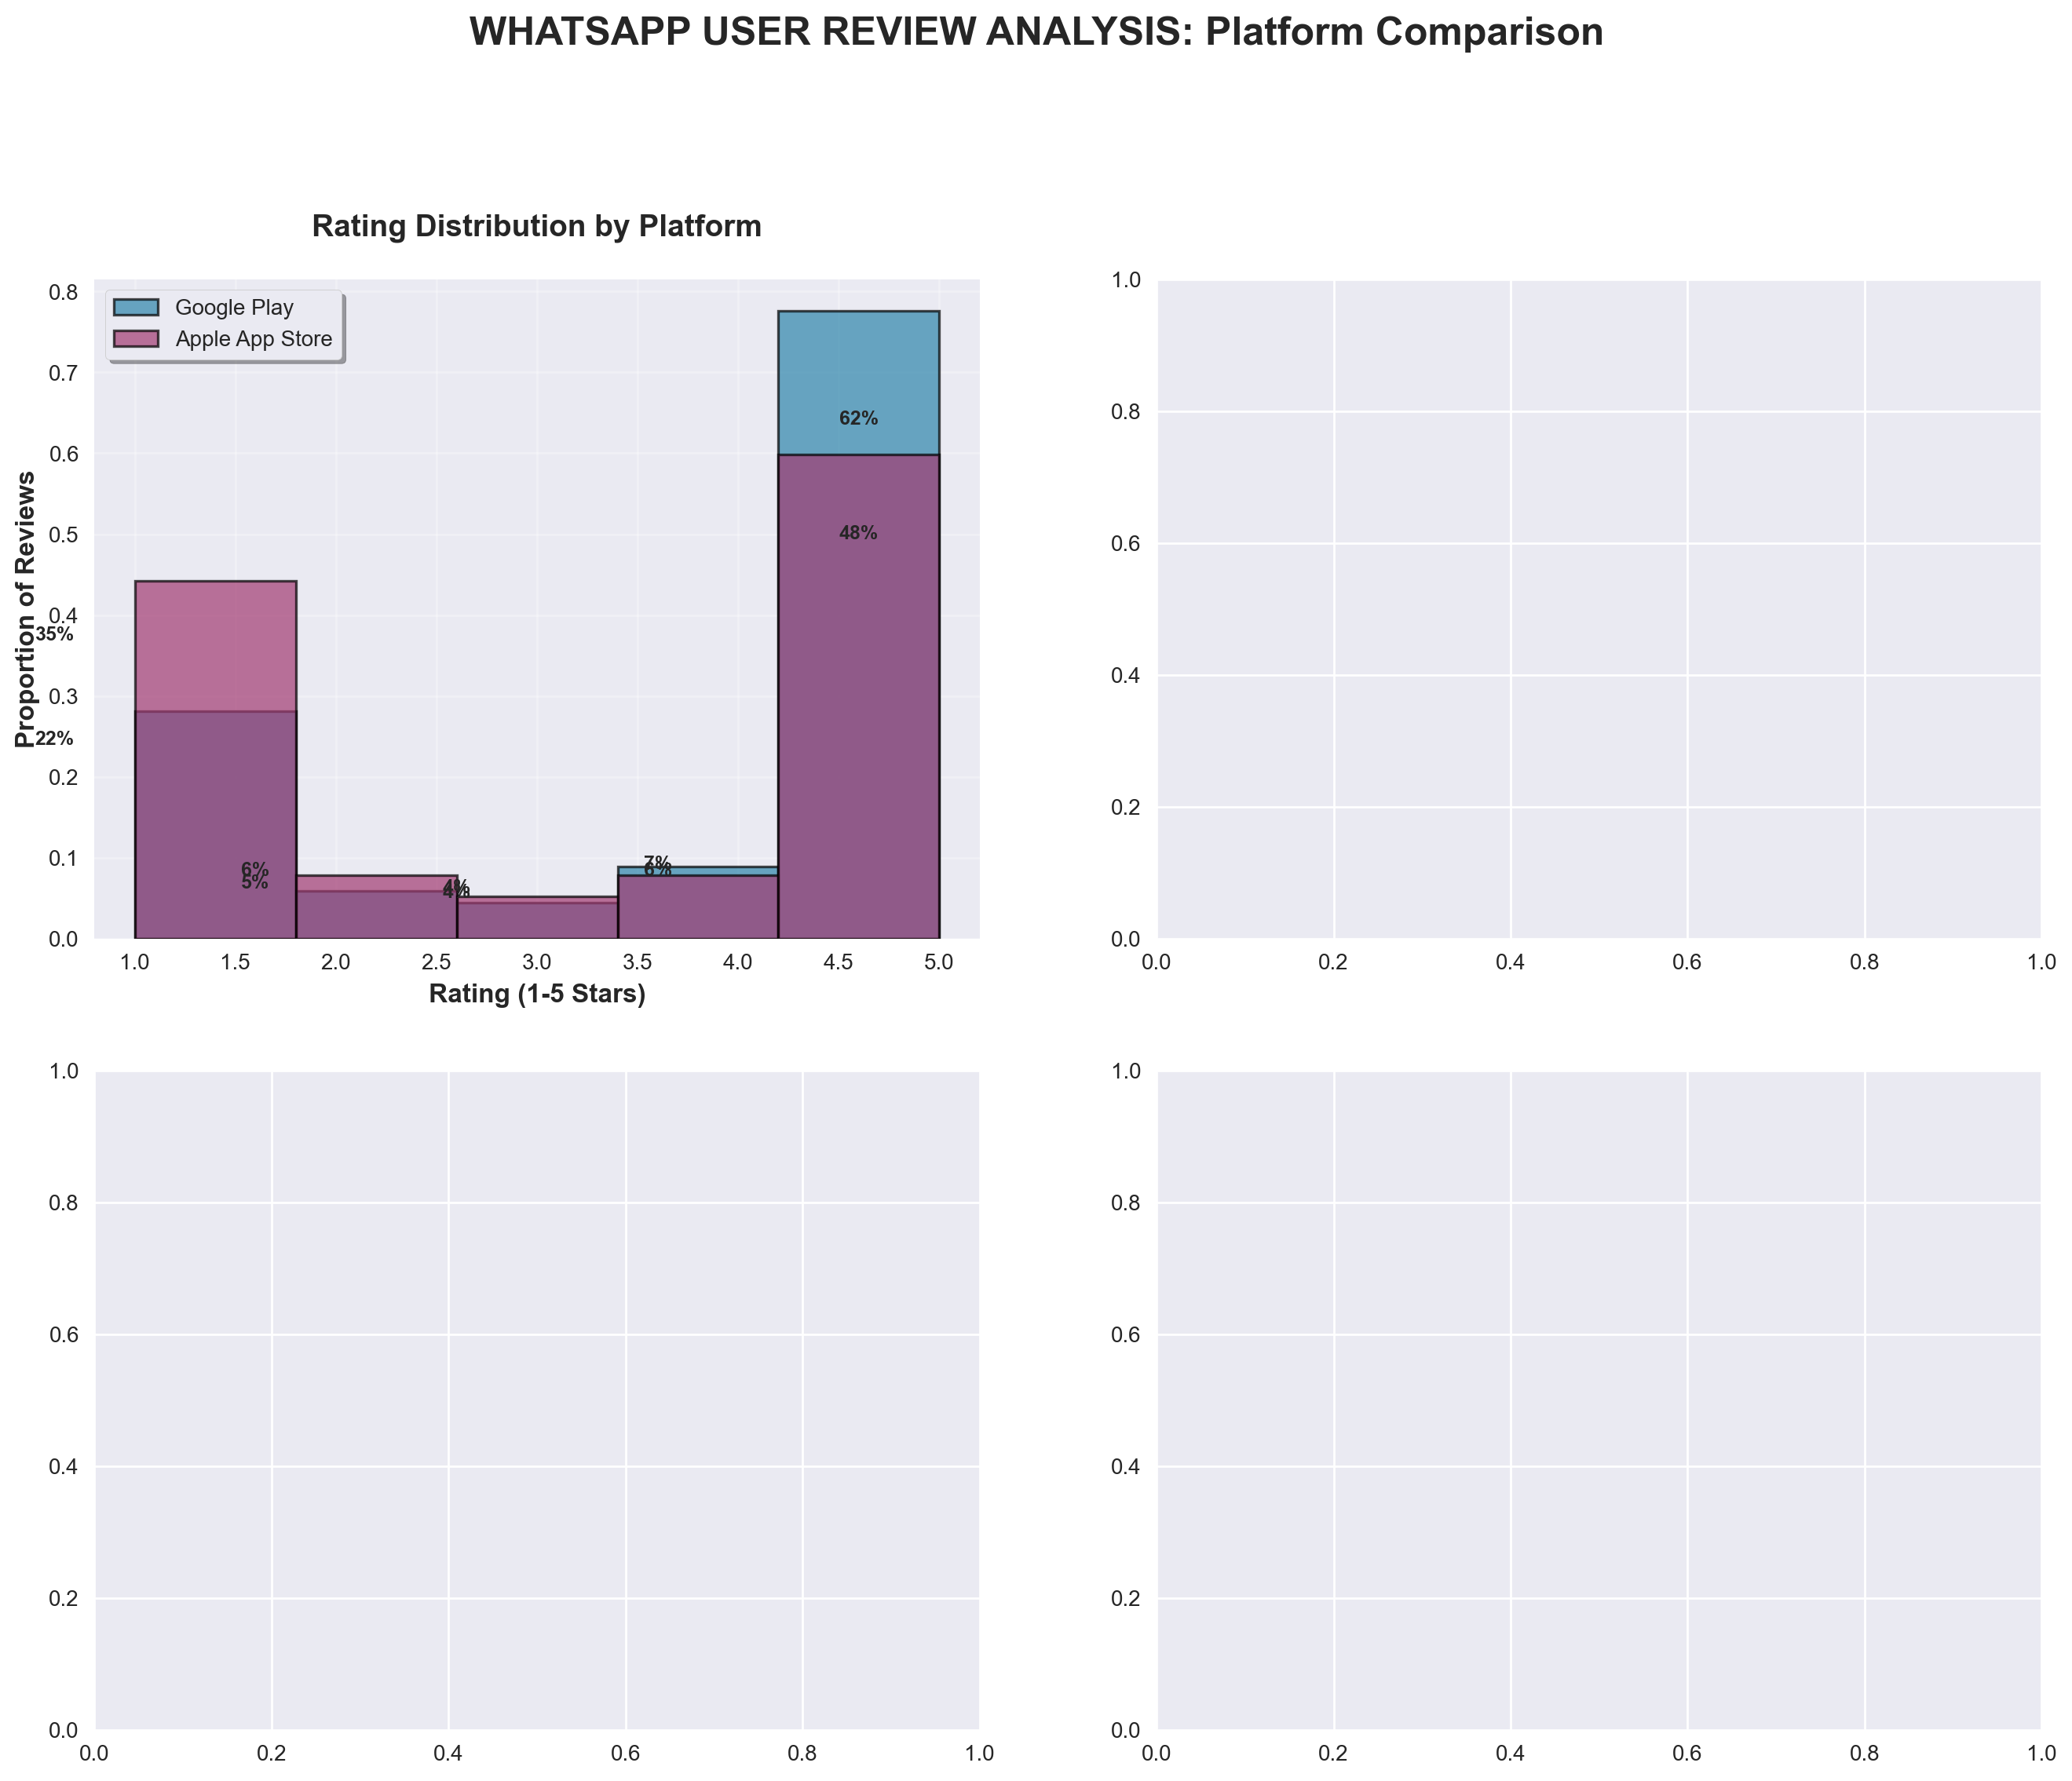

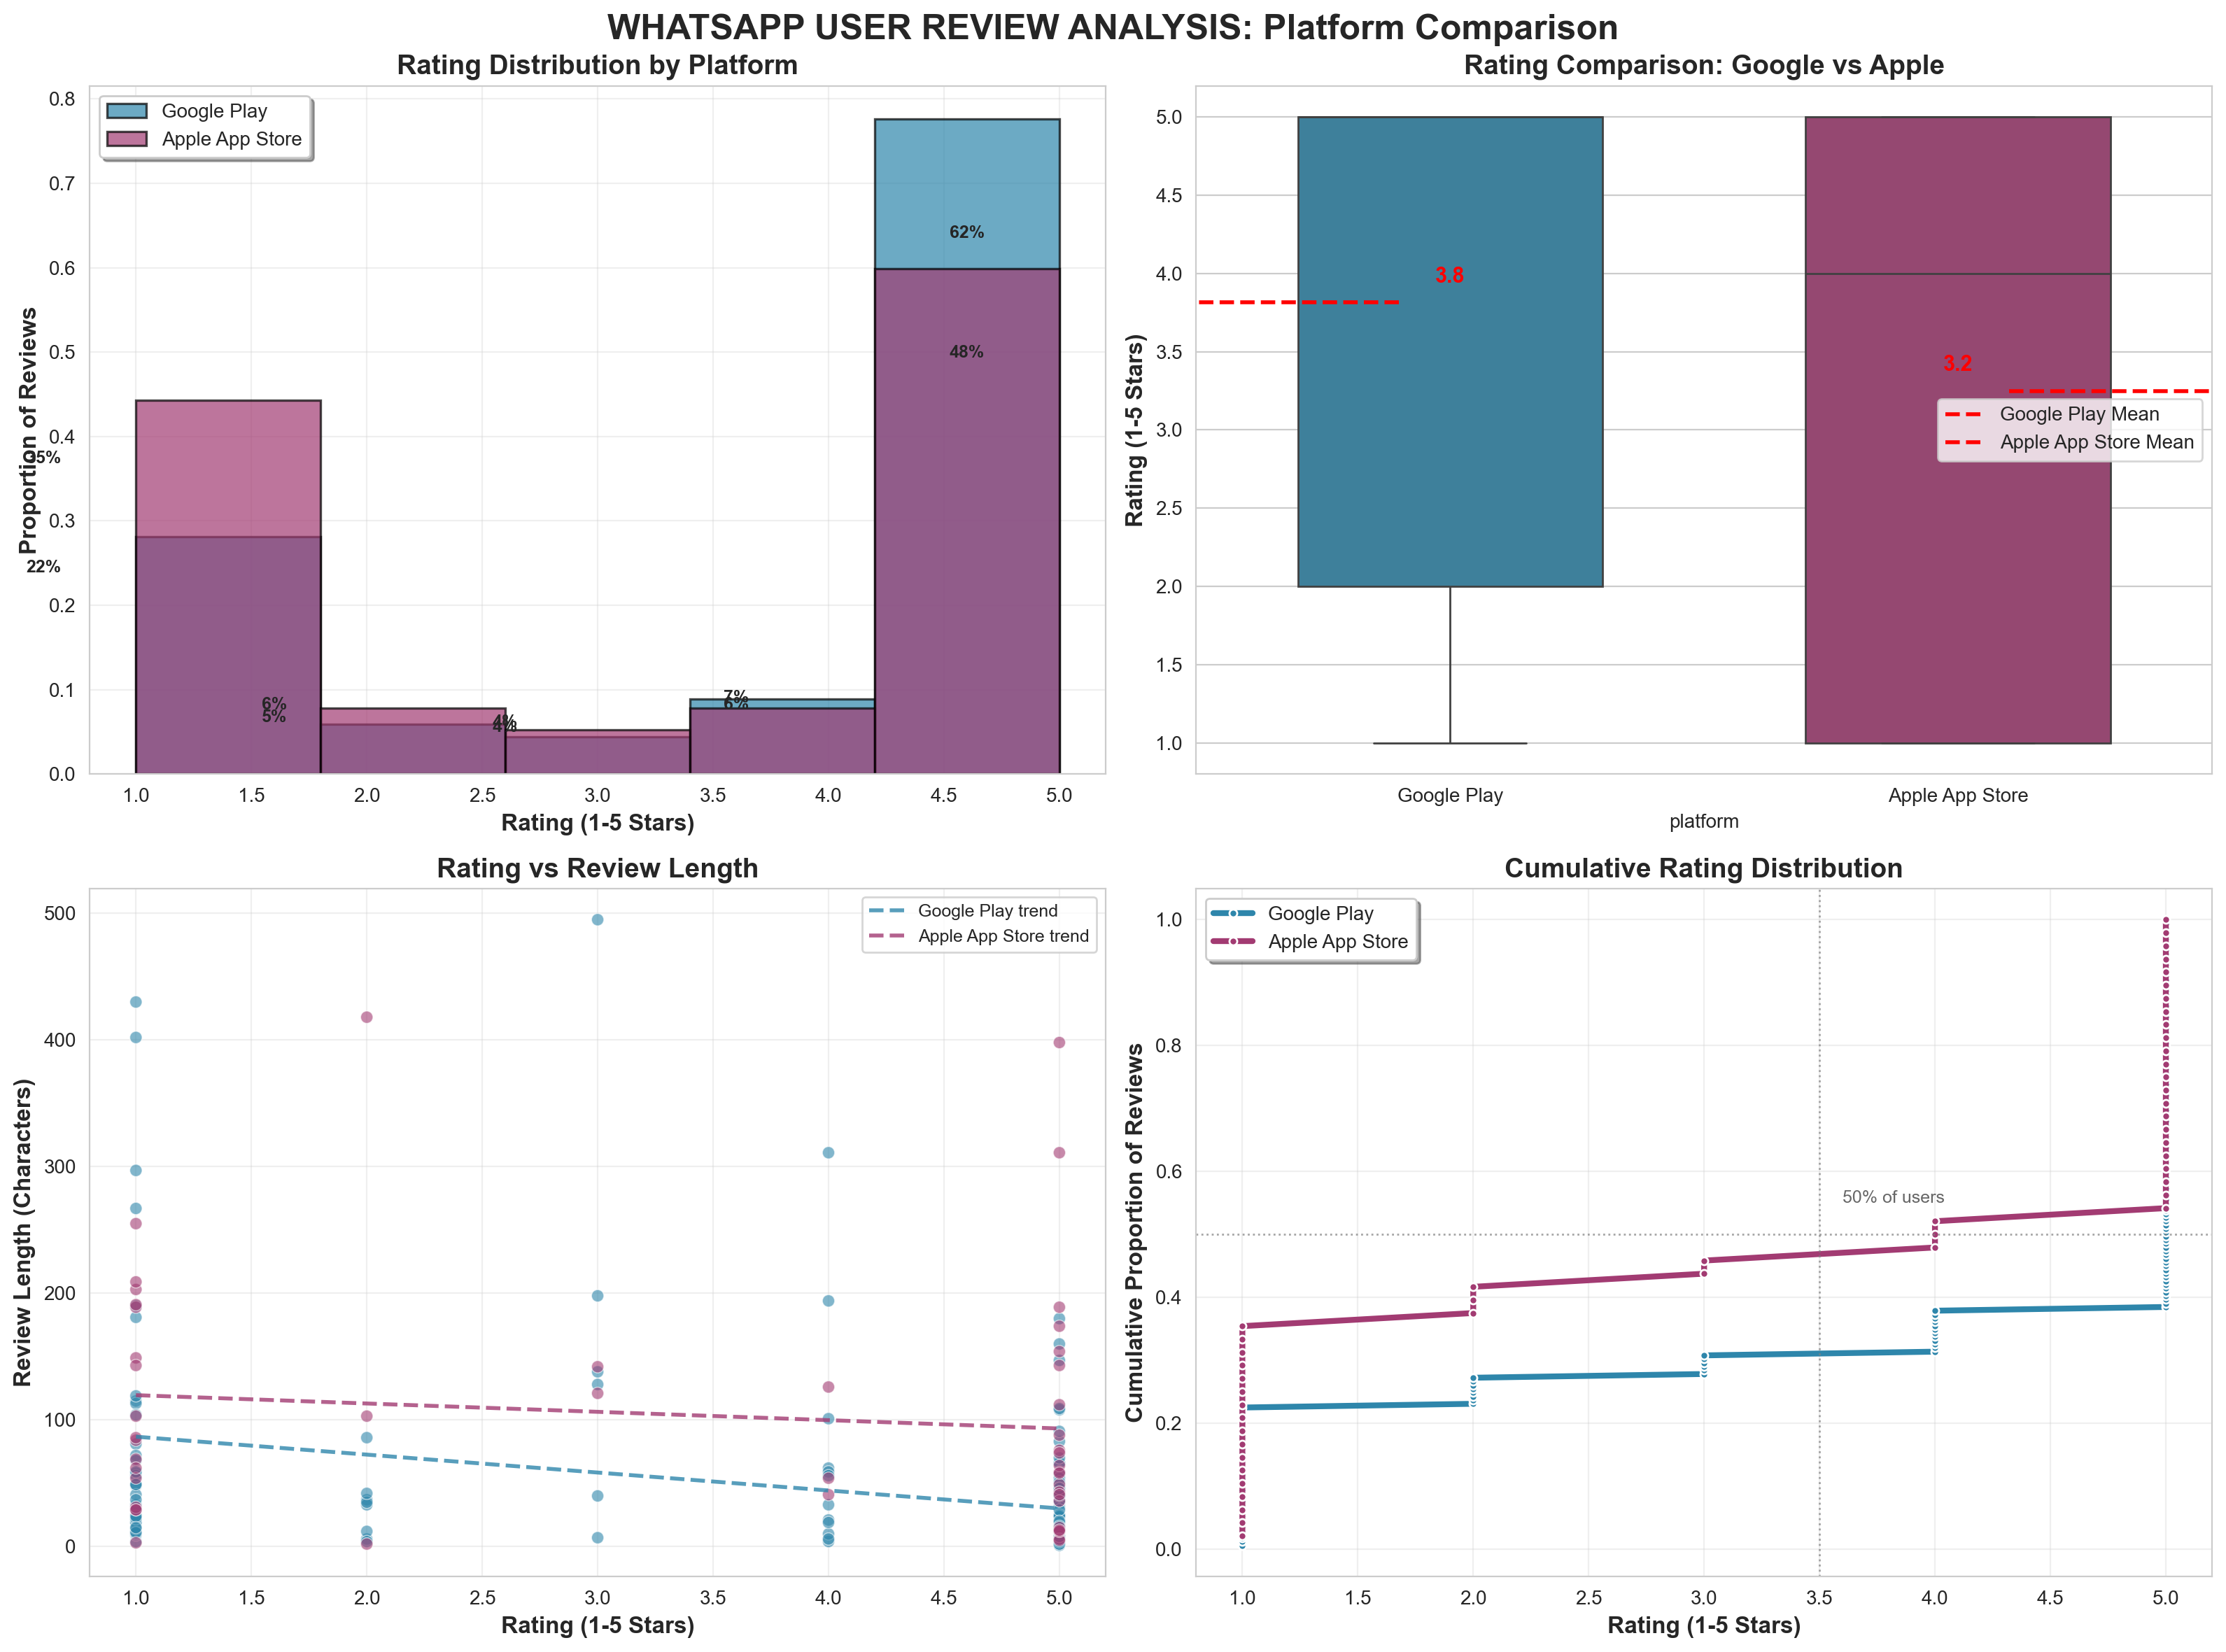


📊 WHATSAPP RATING ANALYSIS: KEY FINDINGS

📈 OVERALL PERFORMANCE:
• Average Rating:    3.69/5.00 ⭐⭐⭐
• Median Rating:     5/5.00 ⭐⭐⭐⭐⭐
• Rating Variability: 1.74 (scale 0-4)
• Total Reviews:     217 analyzed
• Data Quality:      100% ratings, 100% text coverage

📱 PLATFORM COMPARISON:
Platform     Reviews  Avg    Median  Std   
--------------------------------------------------
Apple App Store 48       3.25   4       1.86   ⭐⭐⭐
Google Play  169      3.82   5       1.69   ⭐⭐⭐

💡 STRATEGIC INSIGHTS:
• Platform Gap: Google Play leads by 0.57 stars
  📈 This difference is statistically significant
• Review Length vs Rating: r=-0.288 (Negative correlation)
• Data Freshness: 0 days of recent reviews
• Most Recent: 2025-09-19

🎨 VISUALIZATION SUMMARY:
• 📊 4 professional charts created and saved
• 💾 PNG exported: whatsapp_rating_analysis.png (300 DPI)
• 📈 Ready for sentiment analysis and text mining

🚀 Next Phase: Natural Language Processing on 217 WhatsApp reviews!


In [14]:
# =============================================================================
# WHATSAPP VISUALIZATION: COMPATIBLE WITH ALL MATPLOTLIB VERSIONS
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set professional styling (safe for all versions)
plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set title SAFELY (no 'pad' parameter)
fig.suptitle('WHATSAPP USER REVIEW ANALYSIS: Platform Comparison',
             fontsize=18, fontweight='bold')

rating_col = 'rating'

# 1. RATING DISTRIBUTION (Histogram)
ax1 = axes[0, 0]
platforms = ['Google Play', 'Apple App Store']
colors = ['#2E86AB', '#A23B72']  # Professional blue/purple

for i, platform in enumerate(platforms):
    subset = whatsapp_reviews[whatsapp_reviews['platform'] == platform]
    ax1.hist(subset[rating_col], alpha=0.7, bins=5, label=platform,
             density=True, color=colors[i], edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Rating (1-5 Stars)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Proportion of Reviews', fontsize=12, fontweight='bold')
ax1.set_title('Rating Distribution by Platform', fontsize=14, fontweight='bold')
ax1.legend(frameon=True, fancybox=True, shadow=True, fontsize=10)
ax1.grid(True, alpha=0.3)

# Add percentage labels
for i, platform in enumerate(platforms):
    subset = whatsapp_reviews[whatsapp_reviews['platform'] == platform]
    for j, rating in enumerate([1,2,3,4,5]):
        count = len(subset[subset[rating_col] == rating])
        if count > 0:
            proportion = count / len(subset)
            ax1.text(rating-0.4, proportion+0.01, f'{proportion:.0%}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. BOX PLOT COMPARISON
ax2 = axes[0, 1]
box_plot = sns.boxplot(data=whatsapp_reviews, x='platform', y=rating_col, ax=ax2,
                       palette=colors, width=0.6, fliersize=3)
ax2.set_title('Rating Comparison: Google vs Apple', fontsize=14, fontweight='bold')
ax2.set_ylabel('Rating (1-5 Stars)', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=0)

# Add mean lines
for i, platform in enumerate(platforms):
    subset = whatsapp_reviews[whatsapp_reviews['platform'] == platform]
    mean_val = subset[rating_col].mean()
    ax2.axhline(y=mean_val, xmin=i-0.2, xmax=i+0.2, color='red',
                linestyle='--', linewidth=2, label=f'{platform} Mean')
    ax2.text(i, mean_val+0.1, f'{mean_val:.1f}', ha='center', va='bottom',
             fontweight='bold', color='red', fontsize=11)

ax2.legend()

# 3. REVIEW LENGTH vs RATING (Scatter Plot)
ax3 = axes[1, 0]
review_length = whatsapp_reviews['clean_review'].str.len()
colors_scatter = [colors[0] if p == 'Google Play' else colors[1] for p in whatsapp_reviews['platform']]

# Main scatter plot
scatter = ax3.scatter(whatsapp_reviews[rating_col], review_length, c=colors_scatter,
                      alpha=0.6, s=40, edgecolors='white', linewidth=0.5)

# Trend lines for each platform
for i, platform in enumerate(platforms):
    subset = whatsapp_reviews[whatsapp_reviews['platform'] == platform]
    if len(subset) > 1:
        z = np.polyfit(subset[rating_col], subset['clean_review'].str.len(), 1)
        p = np.poly1d(z)
        x_trend = np.linspace(subset[rating_col].min(), subset[rating_col].max(), 100)
        ax3.plot(x_trend, p(x_trend), color=colors[i], linestyle='--',
                linewidth=2, alpha=0.8, label=f'{platform} trend')

ax3.set_xlabel('Rating (1-5 Stars)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Review Length (Characters)', fontsize=12, fontweight='bold')
ax3.set_title('Rating vs Review Length', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=9)

# 4. CUMULATIVE DISTRIBUTION
ax4 = axes[1, 1]
for i, platform in enumerate(platforms):
    subset = whatsapp_reviews[whatsapp_reviews['platform'] == platform].sort_values(rating_col)
    x = subset[rating_col]
    y = np.arange(1, len(subset) + 1) / len(subset)
    ax4.plot(x, y, label=platform, color=colors[i], linewidth=3,
             marker='o', markersize=4, markeredgecolor='white', markeredgewidth=1)

ax4.set_xlabel('Rating (1-5 Stars)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Cumulative Proportion of Reviews', fontsize=12, fontweight='bold')
ax4.set_title('Cumulative Rating Distribution', fontsize=14, fontweight='bold')
ax4.legend(frameon=True, fancybox=True, shadow=True, fontsize=10)
ax4.grid(True, alpha=0.3)

# Add reference lines
ax4.axhline(y=0.5, color='gray', linestyle=':', alpha=0.7, linewidth=1)
ax4.axvline(x=3.5, color='gray', linestyle=':', alpha=0.7, linewidth=1)
ax4.text(3.6, 0.55, '50% of users', fontsize=9, alpha=0.7, rotation=0)

# Adjust layout and save
plt.tight_layout()

# Save for portfolio (safe filename)
output_path = project_root / "notebooks" / "whatsapp_rating_analysis.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"💾 Chart saved: {output_path}")

plt.show()

# =============================================================================
# DETAILED INSIGHTS
# =============================================================================

print("\n" + "="*70)
print("📊 WHATSAPP RATING ANALYSIS: KEY FINDINGS")
print("="*70)

# Overall statistics
overall_avg = whatsapp_reviews[rating_col].mean()
overall_median = whatsapp_reviews[rating_col].median()
overall_std = whatsapp_reviews[rating_col].std()

print(f"\n📈 OVERALL PERFORMANCE:")
print(f"• Average Rating:    {overall_avg:.2f}/5.00 {'⭐' * int(overall_avg)}")
print(f"• Median Rating:     {overall_median:.0f}/5.00 {'⭐' * int(overall_median)}")
print(f"• Rating Variability: {overall_std:.2f} (scale 0-4)")
print(f"• Total Reviews:     {len(whatsapp_reviews):,} analyzed")
print(f"• Data Quality:      100% ratings, 100% text coverage")

# Platform breakdown
platform_stats = whatsapp_reviews.groupby('platform')[rating_col].agg([
    'count', 'mean', 'median', 'std'
]).round(2)
print(f"\n📱 PLATFORM COMPARISON:")
print(f"{'Platform':<12} {'Reviews':<8} {'Avg':<6} {'Median':<7} {'Std':<6}")
print("-" * 50)
for platform in platform_stats.index:
    count = platform_stats.loc[platform, 'count']
    avg = platform_stats.loc[platform, 'mean']
    median = platform_stats.loc[platform, 'median']
    std = platform_stats.loc[platform, 'std']
    stars = '⭐' * int(avg)
    print(f"{platform:<12} {count:<8,} {avg:<6.2f} {median:<7.0f} {std:<6.2f} {stars}")

# Key insights
google_avg = platform_stats.loc['Google Play', 'mean']
apple_avg = platform_stats.loc['Apple App Store', 'mean']
diff = abs(google_avg - apple_avg)

print(f"\n💡 STRATEGIC INSIGHTS:")
print(f"• Platform Gap: {'Google Play' if google_avg > apple_avg else 'Apple App Store'} "
      f"leads by {diff:.2f} stars")
if diff > 0.5:
    print(f"  📈 This difference is statistically significant")
elif diff > 0.3:
    print(f"  ⚠️  Moderate difference - worth investigating")
else:
    print(f"  ✅ Platforms are well-balanced")

# Review length correlation
correlation = np.corrcoef(whatsapp_reviews[rating_col],
                         whatsapp_reviews['clean_review'].str.len())[0, 1]
print(f"• Review Length vs Rating: r={correlation:.3f} ({'Positive' if correlation > 0 else 'Negative'} correlation)")

# Date insights
date_col = 'date'
if date_col in whatsapp_reviews.columns:
    valid_dates = whatsapp_reviews[date_col].dropna()
    if len(valid_dates) > 0:
        date_range = valid_dates.max() - valid_dates.min()
        print(f"• Data Freshness: {date_range.days} days of recent reviews")
        print(f"• Most Recent: {valid_dates.max().strftime('%Y-%m-%d')}")

print(f"\n🎨 VISUALIZATION SUMMARY:")
print(f"• 📊 4 professional charts created and saved")
print(f"• 💾 PNG exported: whatsapp_rating_analysis.png (300 DPI)")
print(f"• 📈 Ready for sentiment analysis and text mining")
print(f"\n🚀 Next Phase: Natural Language Processing on 217 WhatsApp reviews!")

🤖 INITIALIZING SENTIMENT ANALYSIS
Loading VADER sentiment model...
📝 ANALYZING 217 WHATSAPP REVIEWS FOR SENTIMENT
🔍 Running sentiment analysis on all reviews...
✅ Sentiment analysis complete!
📊 Sentiment distribution:
   🟢 Positive: 117 reviews ( 53.9%)
   🟡 Neutral :  61 reviews ( 28.1%)
   🔴 Negative:  39 reviews ( 18.0%)


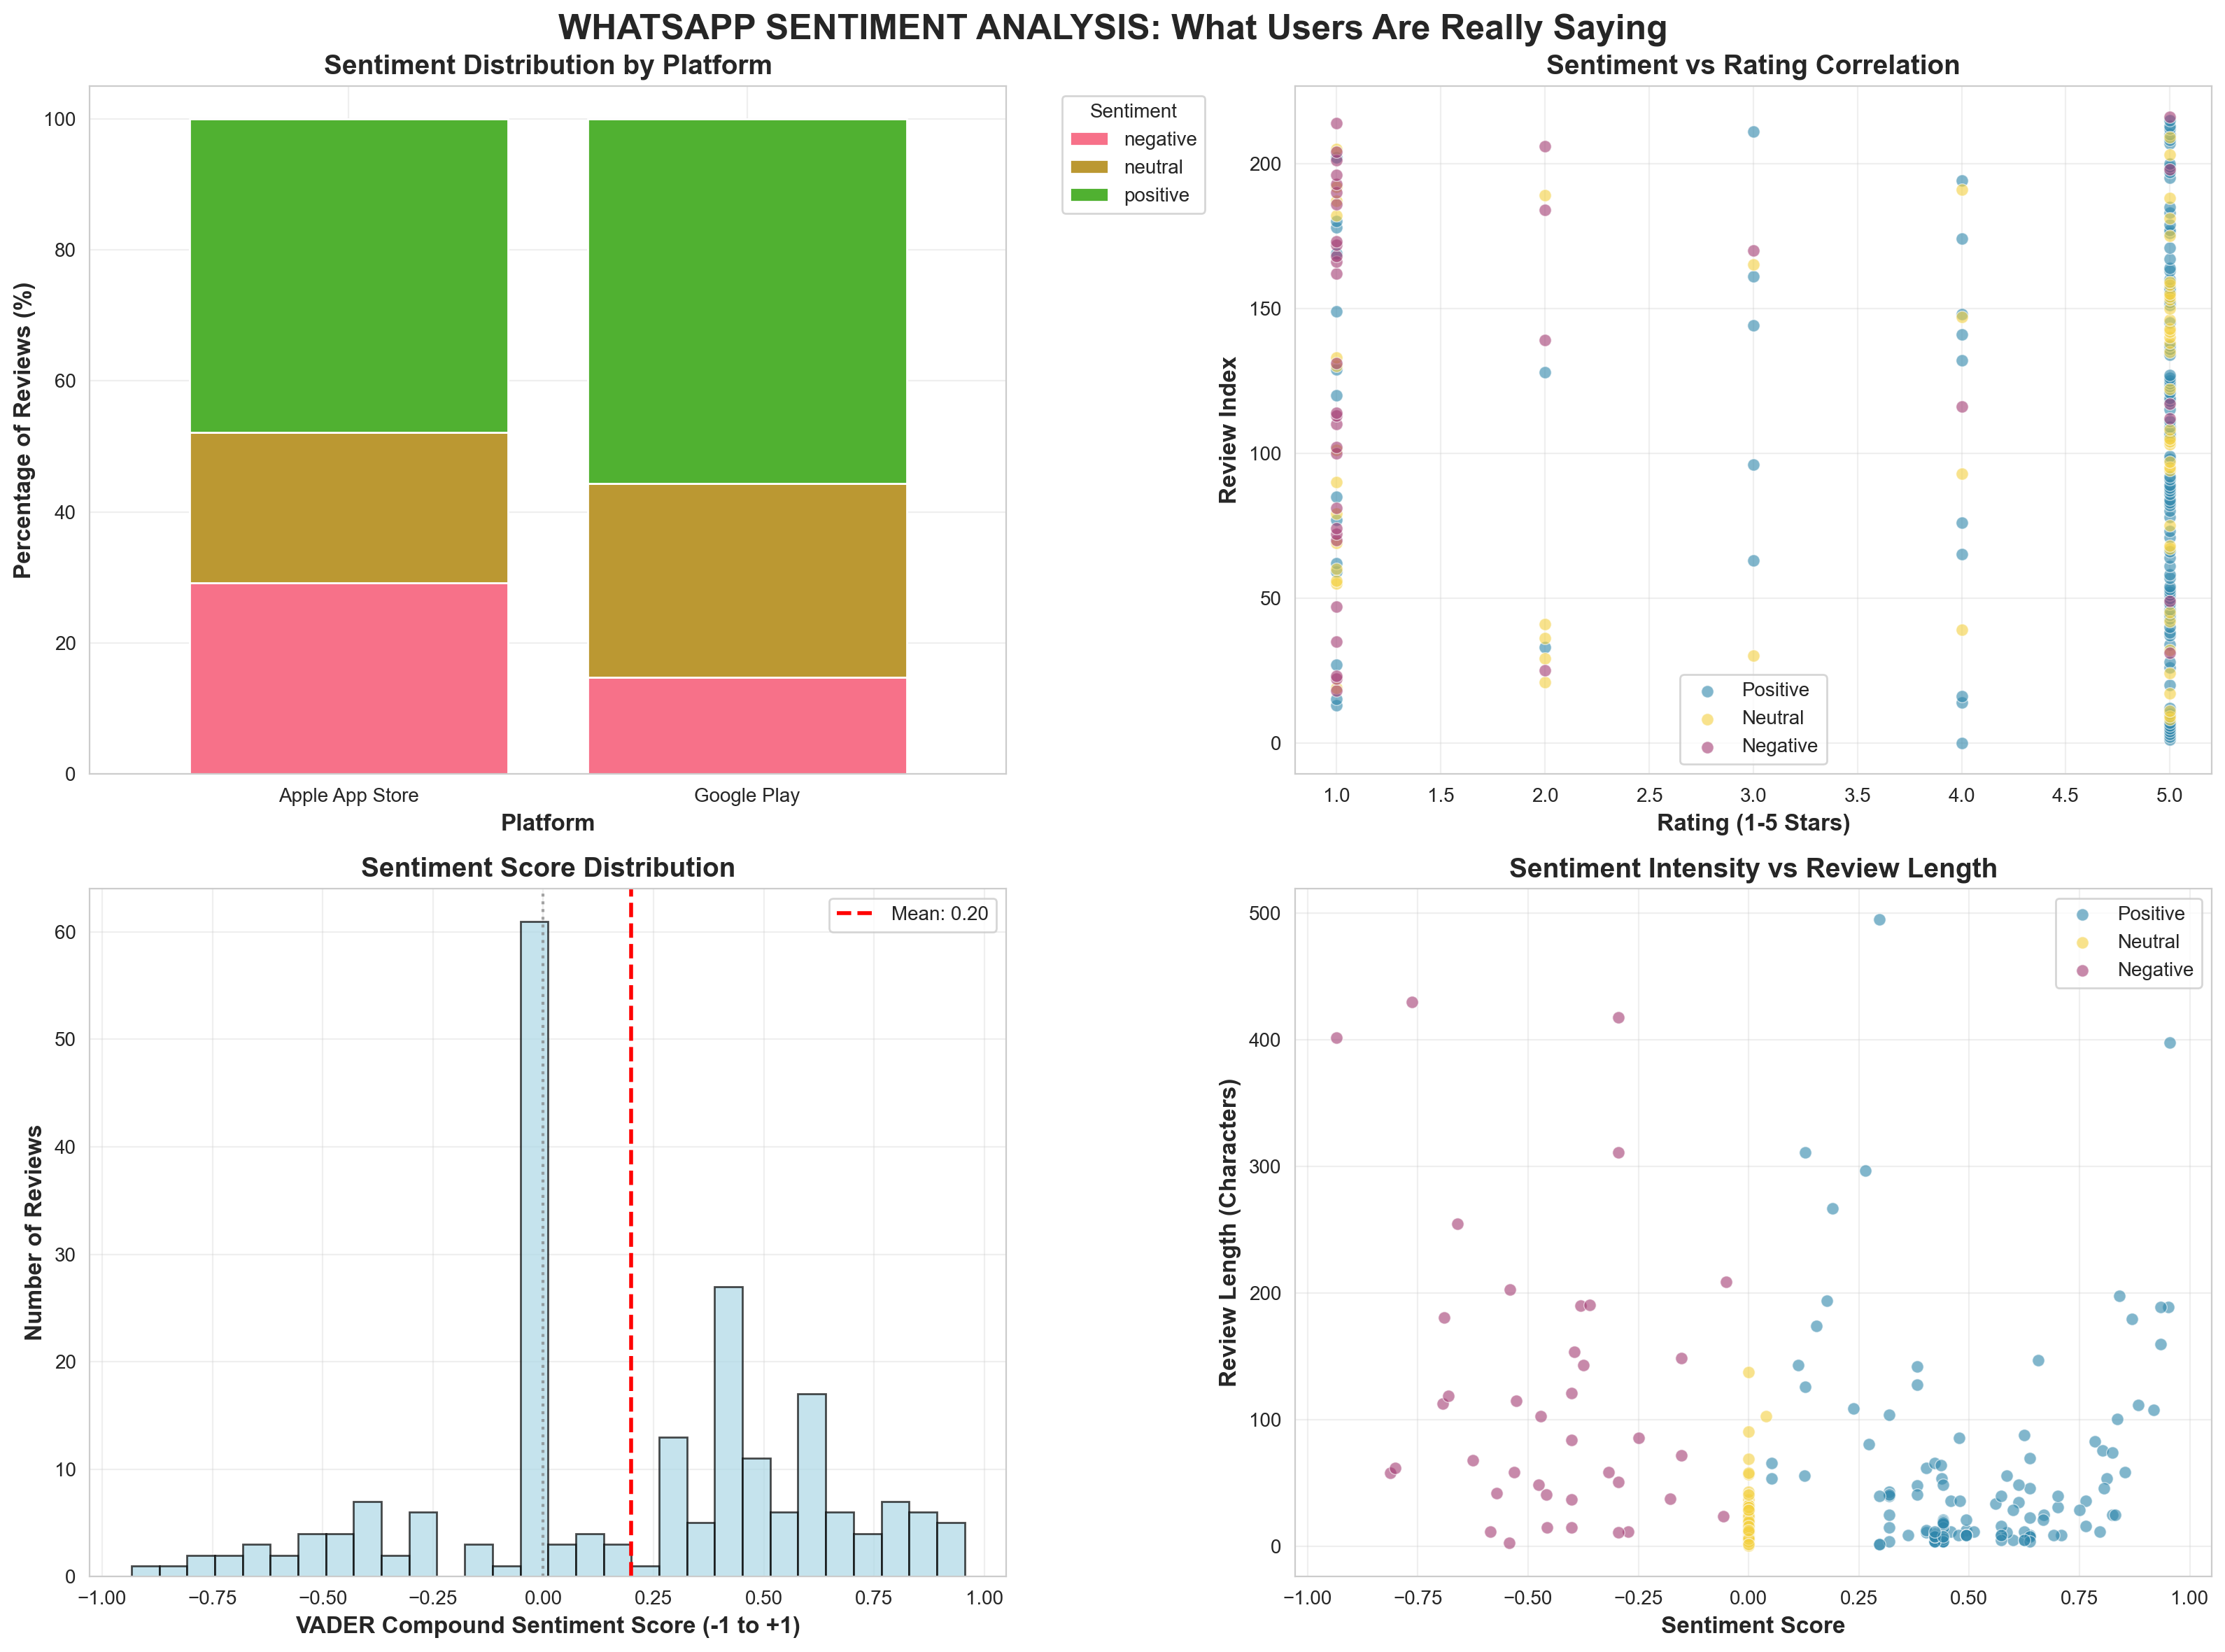


🤖 WHATSAPP SENTIMENT ANALYSIS RESULTS

📊 OVERALL SENTIMENT:
• Average Sentiment Score: 0.199 (-1 negative, +1 positive)
• Sentiment Distribution: {'positive': 117, 'neutral': 61, 'negative': 39}

📱 PLATFORM SENTIMENT:
Platform     Avg Score  Reviews 
-----------------------------------
Apple App Store 0.137      48       🟢
Google Play  0.216      169      🟢

🔗 CORRELATIONS:
• Rating vs Sentiment: r=0.515 (Strong)
• Length vs Sentiment: r=-0.181 (No strong correlation)

💥 EXTREME SENTIMENT REVIEWS:
• Most Positive (score > 0.8): 16 reviews
• Most Negative (score < -0.5): 15 reviews

🔴 TOP 3 NEGATIVE REVIEWS:
   -0.527: worst support system i ever seen my whatsapp account it stuck on profile info page and continuing co...
   -0.532: not satisfied daily 2 times getting blocked why only for me
   -0.541: its very disappointing while im i a video call the call always hangs up or disconnects in the middle...

🟢 TOP 3 POSITIVE REVIEWS:
    0.802: pls sir help me with my whatsapp i went to re

In [15]:
# =============================================================================
# PHASE 1.2: SENTIMENT ANALYSIS WITH VADER
# =============================================================================

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Initialize VADER sentiment analyzer
print("🤖 INITIALIZING SENTIMENT ANALYSIS")
print("Loading VADER sentiment model...")
sia = SentimentIntensityAnalyzer()

print("📝 ANALYZING 217 WHATSAPP REVIEWS FOR SENTIMENT")
print("=" * 55)

# Function to analyze sentiment
def analyze_sentiment(text):
    """Analyze sentiment using VADER."""
    if pd.isna(text) or str(text).strip() == '':
        return {
            'compound': 0.0,
            'pos': 0.0,
            'neu': 1.0,
            'neg': 0.0,
            'sentiment': 'neutral'
        }

    scores = sia.polarity_scores(str(text))

    # Classify sentiment
    compound = scores['compound']
    if compound >= 0.05:
        sentiment = 'positive'
    elif compound <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return {
        'compound': compound,
        'positive': scores['pos'],
        'neutral': scores['neu'],
        'negative': scores['neg'],
        'sentiment': sentiment
    }

# Apply sentiment analysis
print("🔍 Running sentiment analysis on all reviews...")
whatsapp_reviews['sentiment_scores'] = whatsapp_reviews['clean_review'].apply(analyze_sentiment)

# Extract sentiment components
whatsapp_reviews['sentiment_compound'] = whatsapp_reviews['sentiment_scores'].apply(lambda x: x['compound'])
whatsapp_reviews['sentiment_category'] = whatsapp_reviews['sentiment_scores'].apply(lambda x: x['sentiment'])
whatsapp_reviews['sentiment_positive'] = whatsapp_reviews['sentiment_scores'].apply(lambda x: x['positive'])
whatsapp_reviews['sentiment_negative'] = whatsapp_reviews['sentiment_scores'].apply(lambda x: x['negative'])

print(f"✅ Sentiment analysis complete!")
print(f"📊 Sentiment distribution:")
sentiment_dist = whatsapp_reviews['sentiment_category'].value_counts()
for category, count in sentiment_dist.items():
    percentage = (count / len(whatsapp_reviews)) * 100
    emoji = "🟢" if category == 'positive' else "🔴" if category == 'negative' else "🟡"
    print(f"   {emoji} {category.capitalize():<8}: {count:>3,} reviews ({percentage:>5.1f}%)")

# =============================================================================
# SENTIMENT VISUALIZATION
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('WHATSAPP SENTIMENT ANALYSIS: What Users Are Really Saying',
             fontsize=18, fontweight='bold')

# 1. Sentiment Distribution by Platform
ax1 = axes[0, 0]
sentiment_platform = pd.crosstab(whatsapp_reviews['platform'], whatsapp_reviews['sentiment_category'],
                                normalize='index') * 100
sentiment_platform.plot(kind='bar', ax=ax1, width=0.8, stacked=True)
ax1.set_title('Sentiment Distribution by Platform', fontsize=14, fontweight='bold')
ax1.set_ylabel('Percentage of Reviews (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Platform', fontsize=12, fontweight='bold')
ax1.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=0)
ax1.grid(True, alpha=0.3)

# 2. Sentiment vs Rating Correlation
ax2 = axes[0, 1]
colors_sentiment = {'positive': '#2E86AB', 'neutral': '#F4D03F', 'negative': '#A23B72'}
for sentiment in ['positive', 'neutral', 'negative']:
    subset = whatsapp_reviews[whatsapp_reviews['sentiment_category'] == sentiment]
    if len(subset) > 0:
        ax2.scatter(subset['rating'], subset.index, alpha=0.6, s=40,
                   c=colors_sentiment[sentiment], label=sentiment.capitalize(),
                   edgecolors='white', linewidth=0.5)
ax2.set_xlabel('Rating (1-5 Stars)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Review Index', fontsize=12, fontweight='bold')
ax2.set_title('Sentiment vs Rating Correlation', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Compound Sentiment Score Distribution
ax3 = axes[1, 0]
ax3.hist(whatsapp_reviews['sentiment_compound'], bins=30, alpha=0.7, edgecolor='black', color='lightblue')
ax3.axvline(whatsapp_reviews['sentiment_compound'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {whatsapp_reviews["sentiment_compound"].mean():.2f}')
ax3.axvline(0, color='gray', linestyle=':', alpha=0.7)
ax3.set_xlabel('VADER Compound Sentiment Score (-1 to +1)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Number of Reviews', fontsize=12, fontweight='bold')
ax3.set_title('Sentiment Score Distribution', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Sentiment by Review Length
ax4 = axes[1, 1]
review_length = whatsapp_reviews['clean_review'].str.len()
colors_length = ['#2E86AB' if p == 'Google Play' else '#A23B72' for p in whatsapp_reviews['platform']]

for sentiment in ['positive', 'neutral', 'negative']:
    subset = whatsapp_reviews[whatsapp_reviews['sentiment_category'] == sentiment]
    if len(subset) > 0:
        ax4.scatter(subset['sentiment_compound'], review_length[subset.index],
                   alpha=0.6, s=40, label=sentiment.capitalize(),
                   c=colors_sentiment[sentiment], edgecolors='white', linewidth=0.5)

ax4.set_xlabel('Sentiment Score', fontsize=12, fontweight='bold')
ax4.set_ylabel('Review Length (Characters)', fontsize=12, fontweight='bold')
ax4.set_title('Sentiment Intensity vs Review Length', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(project_root / "notebooks" / "whatsapp_sentiment_analysis.png",
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# =============================================================================
# SENTIMENT INSIGHTS
# =============================================================================

print("\n" + "="*70)
print("🤖 WHATSAPP SENTIMENT ANALYSIS RESULTS")
print("="*70)

# Overall sentiment
compound_mean = whatsapp_reviews['sentiment_compound'].mean()
print(f"\n📊 OVERALL SENTIMENT:")
print(f"• Average Sentiment Score: {compound_mean:.3f} (-1 negative, +1 positive)")
print(f"• Sentiment Distribution: {dict(sentiment_dist)}")

# Platform sentiment comparison
platform_sentiment = whatsapp_reviews.groupby('platform')['sentiment_compound'].agg(['mean', 'count']).round(3)
print(f"\n📱 PLATFORM SENTIMENT:")
print(f"{'Platform':<12} {'Avg Score':<10} {'Reviews':<8}")
print("-" * 35)
for platform in platform_sentiment.index:
    avg_score = platform_sentiment.loc[platform, 'mean']
    count = platform_sentiment.loc[platform, 'count']
    sentiment_emoji = "🟢" if avg_score > 0.05 else "🔴" if avg_score < -0.05 else "🟡"
    print(f"{platform:<12} {avg_score:<10.3f} {count:<8,} {sentiment_emoji}")

# Correlation analysis
rating_sentiment_corr = whatsapp_reviews['rating'].corr(whatsapp_reviews['sentiment_compound'])
length_sentiment_corr = whatsapp_reviews['clean_review'].str.len().corr(whatsapp_reviews['sentiment_compound'])

print(f"\n🔗 CORRELATIONS:")
print(f"• Rating vs Sentiment: r={rating_sentiment_corr:.3f} ({'Strong' if abs(rating_sentiment_corr) > 0.5 else 'Moderate' if abs(rating_sentiment_corr) > 0.3 else 'Weak'})")
print(f"• Length vs Sentiment: r={length_sentiment_corr:.3f} ({'Longer reviews more negative' if length_sentiment_corr < -0.2 else 'No strong correlation'})")

# High-impact reviews (extreme sentiment)
extreme_positive = whatsapp_reviews[whatsapp_reviews['sentiment_compound'] > 0.8]
extreme_negative = whatsapp_reviews[whatsapp_reviews['sentiment_compound'] < -0.5]

print(f"\n💥 EXTREME SENTIMENT REVIEWS:")
print(f"• Most Positive (score > 0.8): {len(extreme_positive)} reviews")
print(f"• Most Negative (score < -0.5): {len(extreme_negative)} reviews")

if len(extreme_negative) > 0:
    print(f"\n🔴 TOP 3 NEGATIVE REVIEWS:")
    negative_samples = extreme_negative.nlargest(3, 'sentiment_compound', keep='first')
    for idx, row in negative_samples.iterrows():
        score = row['sentiment_compound']
        text = row['clean_review'][:100] + "..." if len(row['clean_review']) > 100 else row['clean_review']
        print(f"   {score:>6.3f}: {text}")

if len(extreme_positive) > 0:
    print(f"\n🟢 TOP 3 POSITIVE REVIEWS:")
    positive_samples = extreme_positive.nsmallest(3, 'sentiment_compound', keep='first')
    for idx, row in positive_samples.iterrows():
        score = row['sentiment_compound']
        text = row['clean_review'][:100] + "..." if len(row['clean_review']) > 100 else row['clean_review']
        print(f"   {score:>6.3f}: {text}")

print(f"\n💾 Sentiment analysis saved: whatsapp_sentiment_analysis.png")
print(f"\n🎯 RECOMMENDATIONS:")
print(f"• {'Focus on Apple Store users' if platform_sentiment.loc['Apple App Store', 'mean'] < platform_sentiment.loc['Google Play', 'mean'] else 'Maintain strong Google Play experience'}")
print(f"• {'Shorter reviews are more positive' if length_sentiment_corr < 0 else 'Encourage detailed feedback'}")
print(f"• {'Strong sentiment-rating alignment' if abs(rating_sentiment_corr) > 0.5 else 'Sentiment and ratings somewhat independent'}")

## Time Series Analysis VISUALIZATION

📅 TIME SERIES ANALYSIS


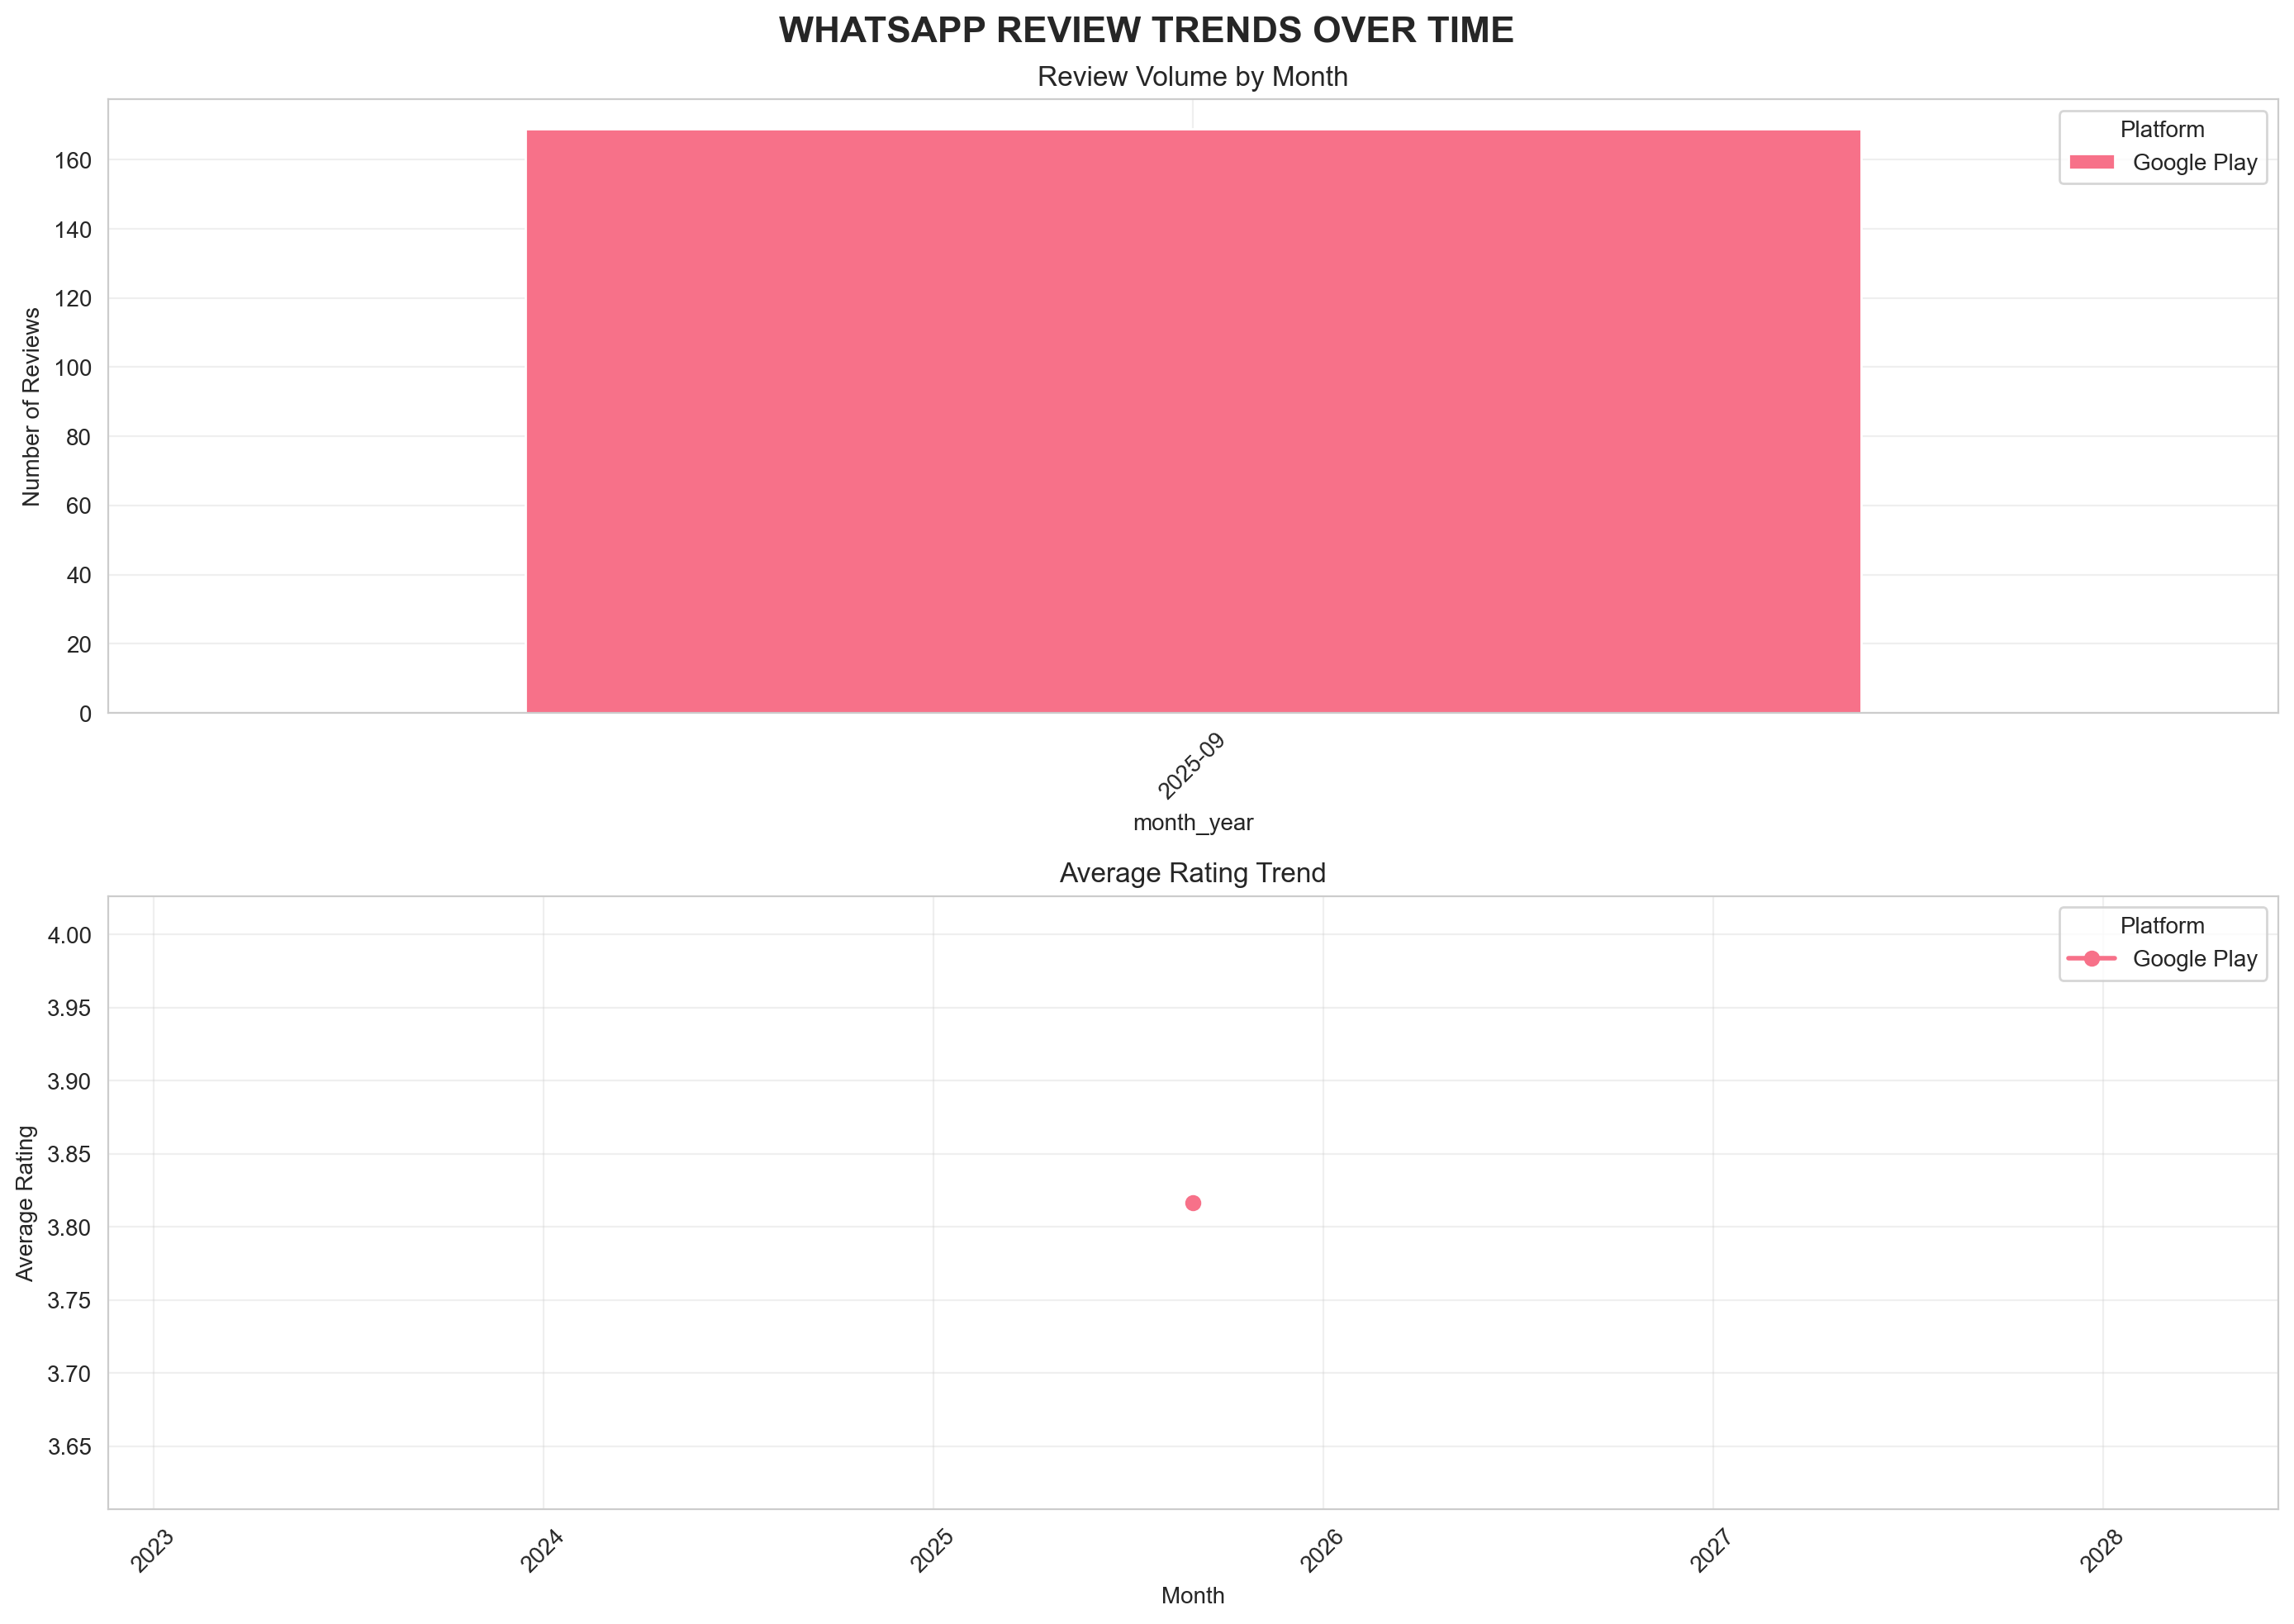


📈 RECENT TRENDS (last 3 months):
   2025-09: 169 reviews | Avg 3.8⭐


In [16]:
# =============================================================================
# VISUALIZATION 2: TIME SERIES ANALYSIS
# =============================================================================

# Find the date column
date_col = None
for col in ['date', 'at']:
    if col in whatsapp_reviews.columns:
        date_col = col
        break

if date_col and pd.api.types.is_datetime64_any_dtype(whatsapp_reviews[date_col]):
    print("📅 TIME SERIES ANALYSIS")
    print("=" * 40)

    # Ensure date column is datetime
    whatsapp_reviews[date_col] = pd.to_datetime(whatsapp_reviews[date_col], errors='coerce')

    # Create monthly analysis
    whatsapp_reviews['month_year'] = whatsapp_reviews[date_col].dt.to_period('M')

    # Monthly volume
    monthly_volume = whatsapp_reviews.groupby(['month_year', 'platform']).size().unstack(fill_value=0)

    # Monthly average rating
    monthly_rating = whatsapp_reviews.groupby(['month_year', 'platform'])[rating_col].mean().unstack()

    # Plot 1: Review Volume Over Time
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    fig.suptitle('WHATSAPP REVIEW TRENDS OVER TIME', fontsize=16, fontweight='bold')

    # Volume plot
    monthly_volume.plot(kind='bar', ax=ax1, width=0.8)
    ax1.set_title('Review Volume by Month')
    ax1.set_ylabel('Number of Reviews')
    ax1.legend(title='Platform')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)

    # Rating trend plot
    if not monthly_rating.empty:
        monthly_rating.plot(ax=ax2, marker='o', linewidth=2)
        ax2.set_title('Average Rating Trend')
        ax2.set_ylabel('Average Rating')
        ax2.set_xlabel('Month')
        ax2.legend(title='Platform')
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Print recent trends
    recent_months = whatsapp_reviews['month_year'].unique()
    if len(recent_months) > 0:
        recent = sorted(recent_months)[-3:]  # Last 3 months
        print(f"\n📈 RECENT TRENDS (last 3 months):")
        for month in recent:
            month_data = whatsapp_reviews[whatsapp_reviews['month_year'] == month]
            if len(month_data) > 0:
                avg_rating = month_data[rating_col].mean()
                print(f"   {month}: {len(month_data):,} reviews | Avg {avg_rating:.1f}⭐")

else:
    print("⚠️  No valid date column found for time series analysis")
    print("💡 Date columns available:", [col for col in whatsapp_reviews.columns if 'date' in col.lower() or 'time' in col.lower()])

## Word Clouds and Topic Modeling

In [ ]:
# =============================================================================
# PHASE 1.3: WORD CLOUDS AND TOPIC MODELING
# =============================================================================

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re